# Time Series Forecasting

In [ ]:
Now forecasting a time series can be broadly divided into two types.

Univariate Time Series Forecasting is when you utilise only the prior values of a time series to predict its future values.

Multi Variate Time Series Forecasting is when you employ predictors other than the series (also known as exogenous variables)
to forecast.

In [10]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [11]:

df = pd.read_csv('TSLA.csv')

df['Date'] = pd.to_datetime(df['Date'])

# Find the earliest date in the dataset
start_date = df['Date'].min()

# Calculate the date 3 years after the earliest date
end_date = start_date + pd.DateOffset(years=3)

# Filter the DataFrame to include only the first 3 years of data
df_first_3_years = df[df['Date'] < end_date]

In [12]:
stock_data = df_first_3_years
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [13]:
stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price

In [14]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [16]:
stock_data.Date = pd.to_datetime(stock_data.Date)

In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [18]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [19]:
stock_data = stock_data.set_index("Date") # setting date as index

In [20]:
stock_data.head(5) 

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


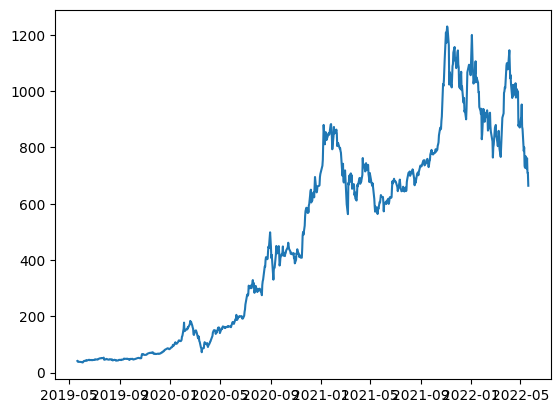

In [21]:
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

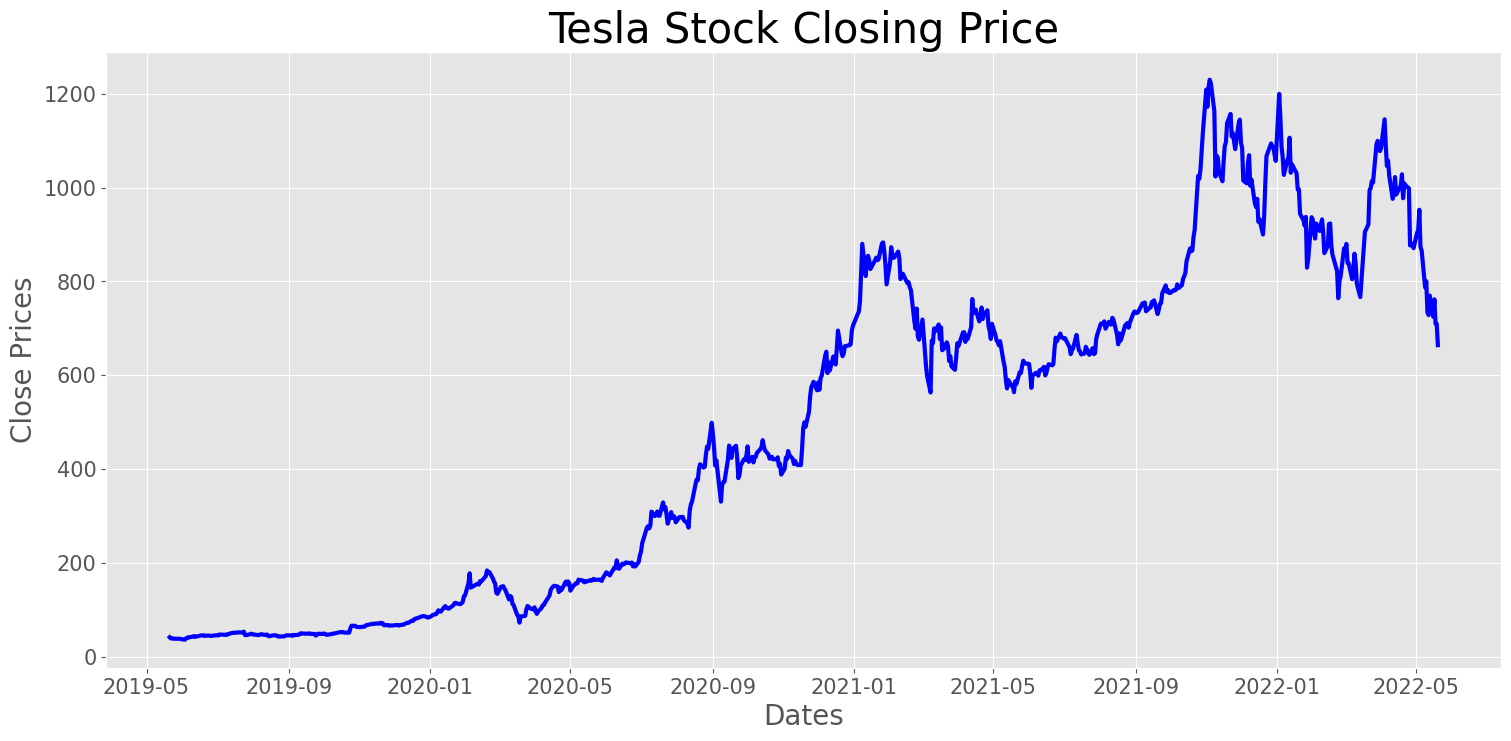

In [22]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

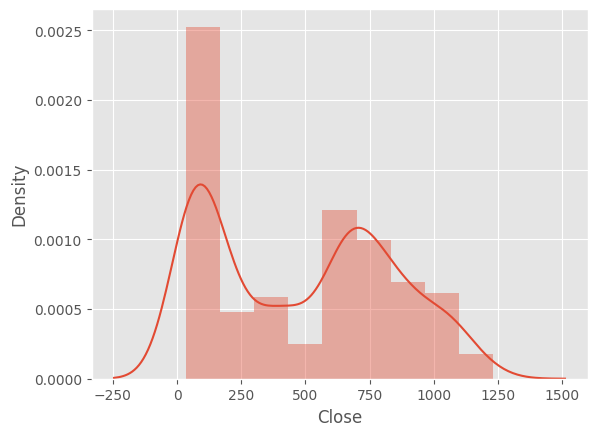

In [23]:
import seaborn as sns
sns.distplot(stock_data['Close'])

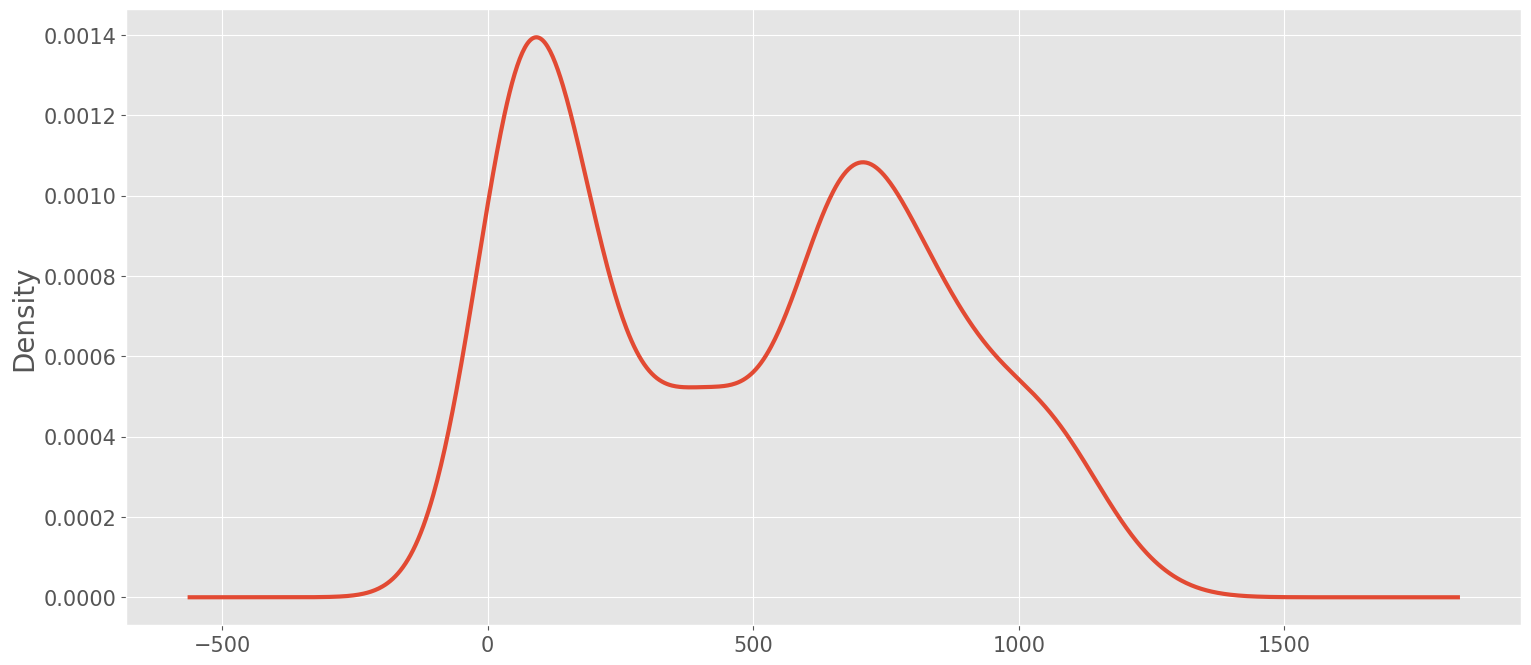

In [24]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

# ADF (Augmented Dickey-Fuller) Test
The Dickey-Fuller test is one of the most extensively used statistical tests. It can be used to establish whether a series 
has a unit root and, as a result, whether the series is stationary. The null and alternate hypotheses for this test are: 
Distinguish between point to point links and multi point links Null Hypothesis: The series has a unit root (a =1).

Alternative Hypothesis: There is no unit root in the series.

The series is considered to be non-stationary if the null hypothesis is not rejected. As a result, the series can be linear 
or difference stationary. If both the mean and standard deviation are flat lines, the series becomes stationary (constant 
mean and constant variance).

In [25]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [26]:
type(stock_data['Close'])

pandas.core.series.Series

In [27]:
np.mean(stock_data['Close'].head(12))

38.51633358001709

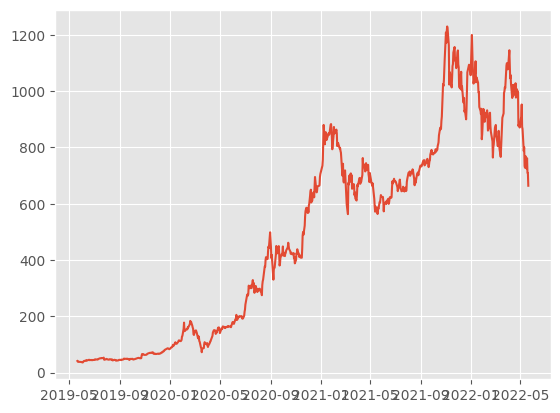

In [28]:
plt.plot(stock_data['Close'])

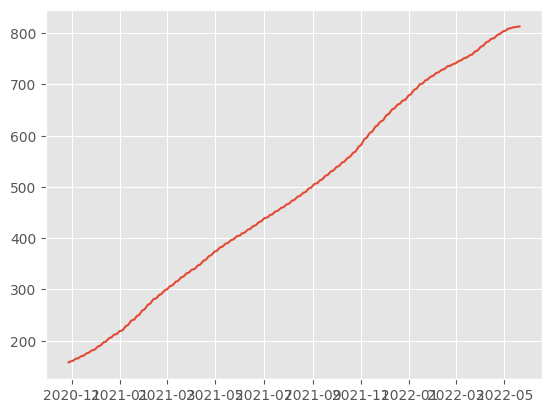

In [29]:
plt.plot(stock_data['Close'].rolling(365).mean())

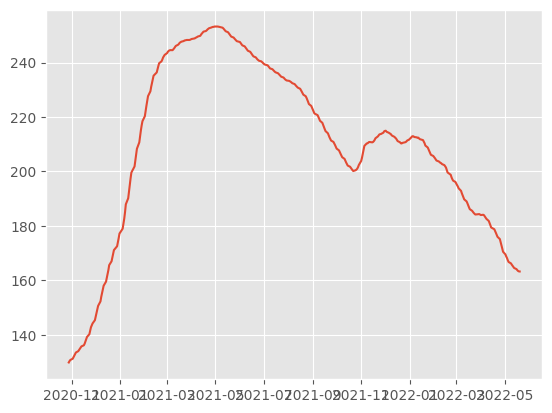

In [30]:
plt.plot(stock_data['Close'].rolling(365).std() )

In [31]:
adfuller(stock_data['Close'],autolag='AIC')

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [32]:
rolmean = timeseries.rolling(12).mean() # rolling mean
rolstd = timeseries.rolling(12).std() # rolling standard deviation

NameError: name 'timeseries' is not defined

In [33]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


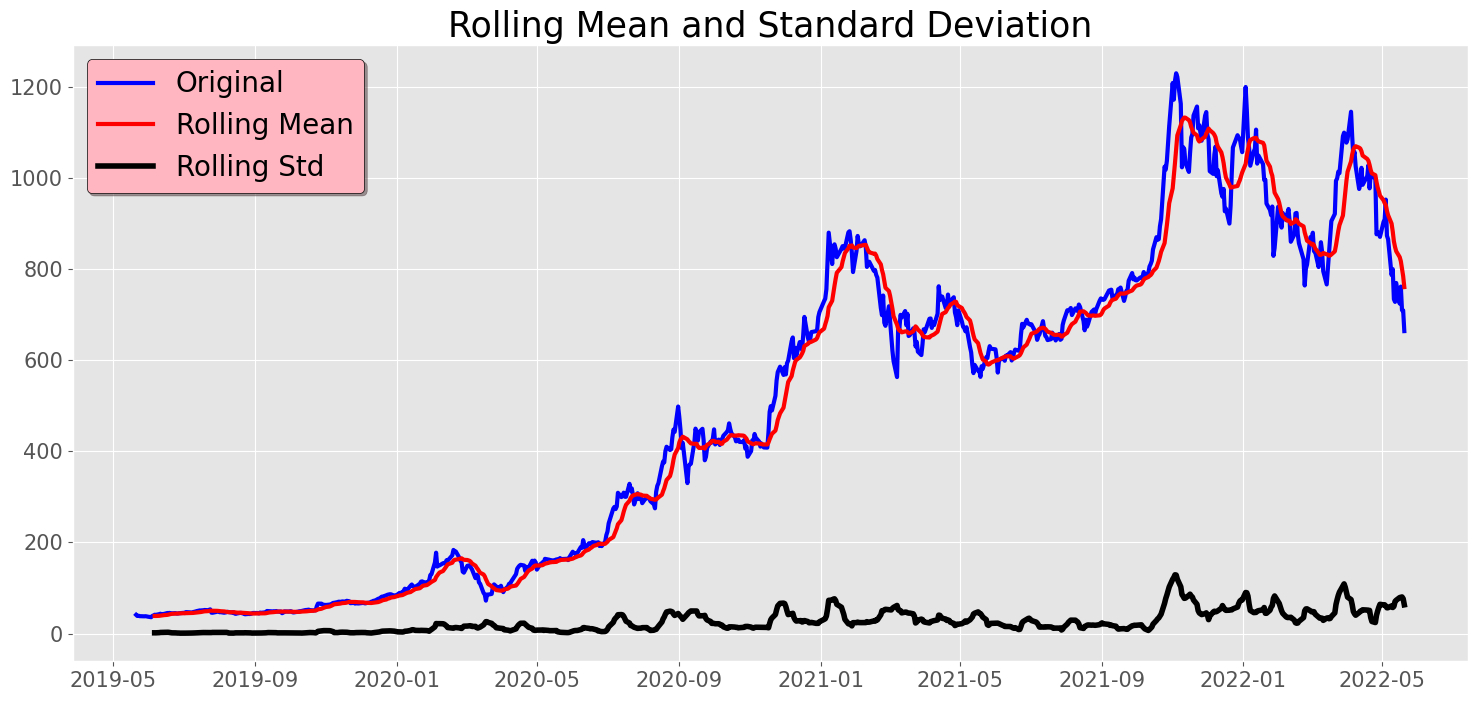

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [34]:
test_stationarity(stock_data['Close'])

We cant reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the 
critical values. As a result, the data is not stationary.
Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in 
preparing data to be used in an ARIMA model. So, to make the data stationary, we need to take the first-order difference of 
the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.

In [35]:
df_close=stock_data['Close']

In [37]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [38]:
38.125999-39.098000

-0.9720009999999988

In [39]:
38.546001-41.015999

-2.469998000000004

In [40]:
df_close.diff()

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [41]:
# the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [42]:
tsla_close_diff_1

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

do differencing until it converts into stationary data where mean and variance are constant

In [43]:
tsla_close_diff_1.dropna(inplace=True)

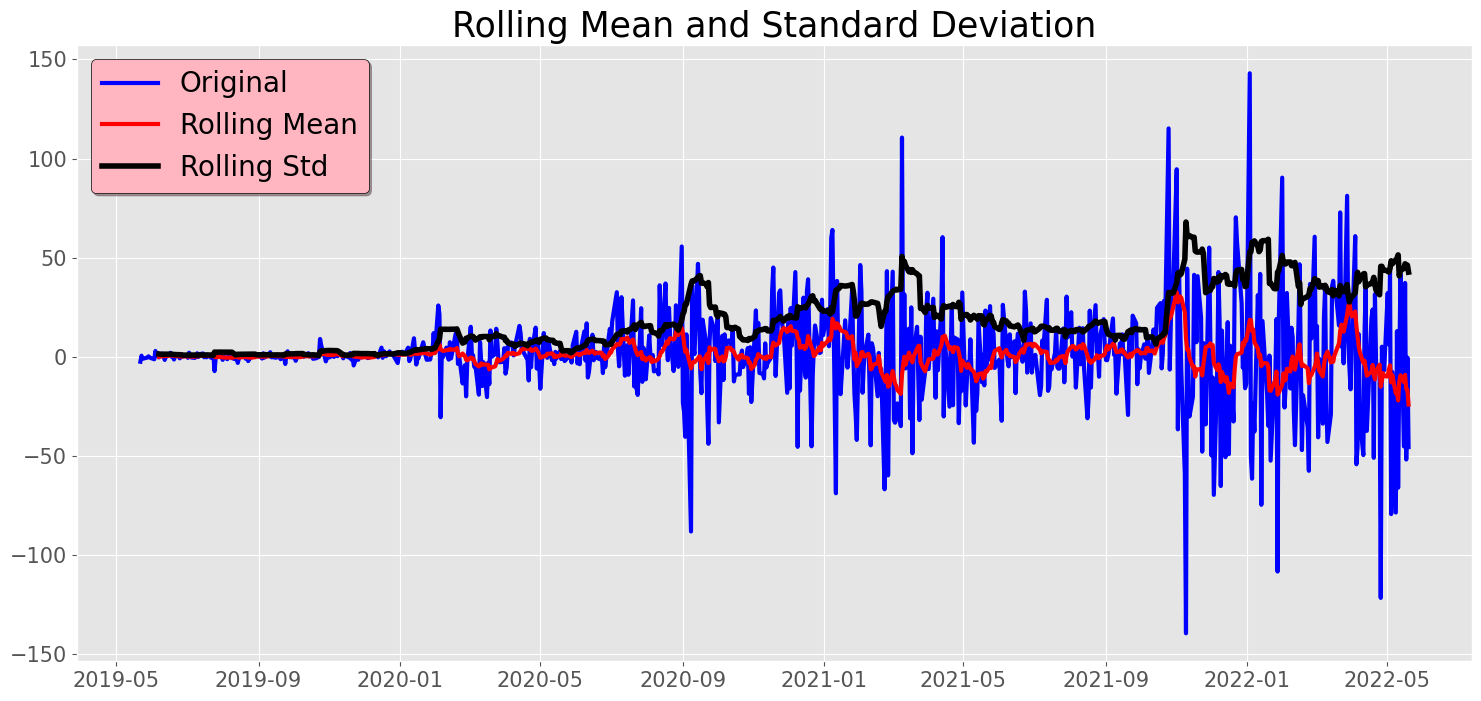

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [44]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

In [45]:
stock_data[["Close"]]

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [47]:
result=seasonal_decompose(stock_data[["Close"]],period=30)

<Figure size 2000x1000 with 0 Axes>

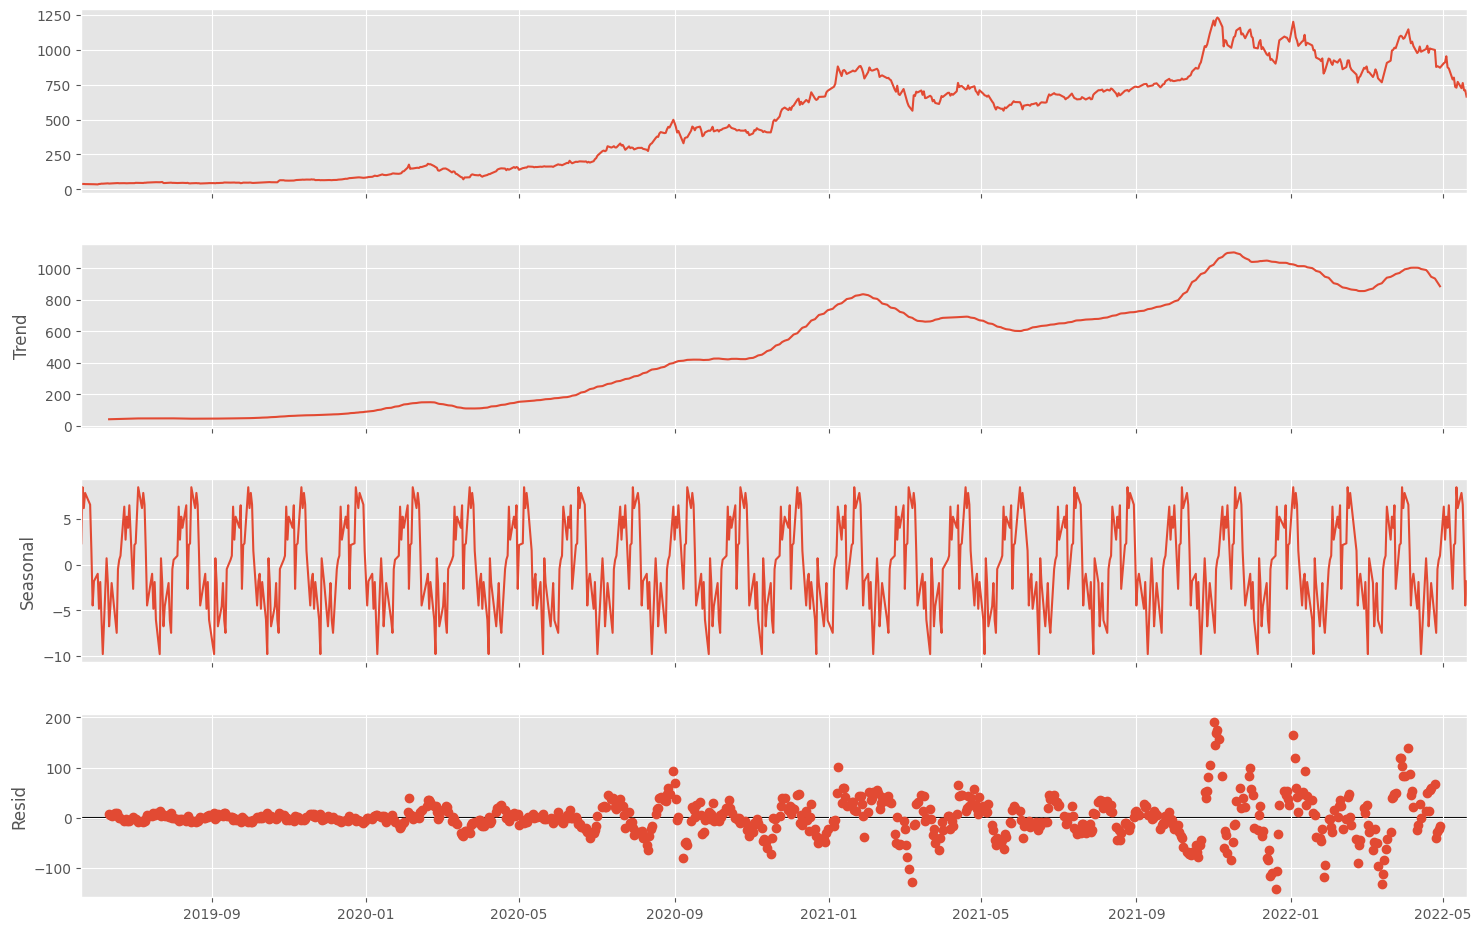

In [48]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

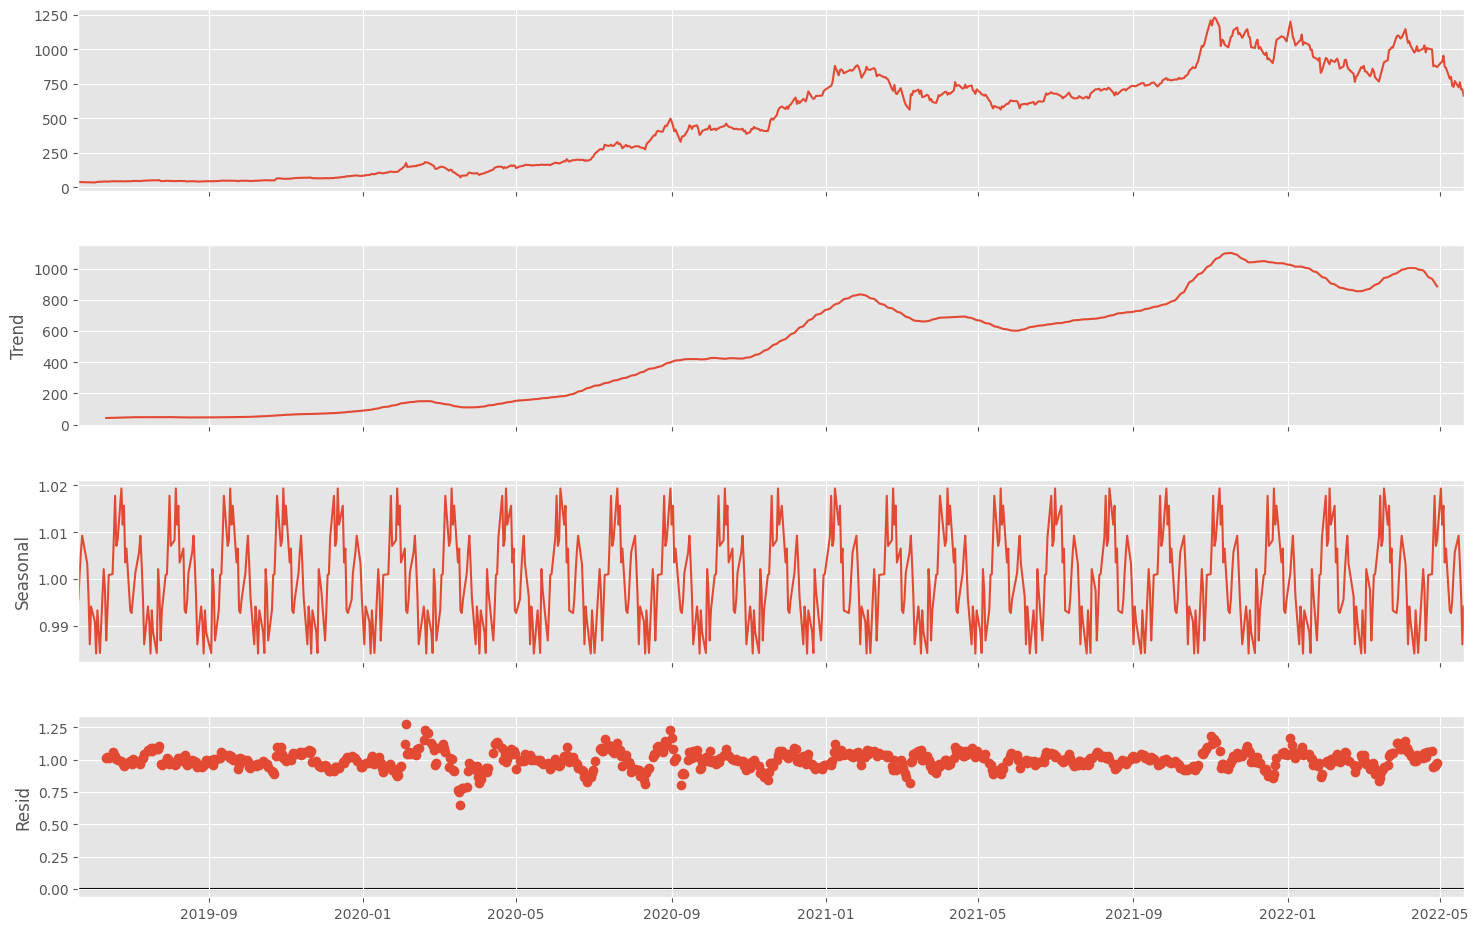

In [50]:
result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [ ]:
Now lets create Arima model and test it

In [51]:
a=[1,2,3,4,5,6,7,8,9,10]

In [52]:
type(a)

list

In [53]:
a[0:7]

[1, 2, 3, 4, 5, 6, 7]

In [54]:
a[0:-3]

[1, 2, 3, 4, 5, 6, 7]

In [55]:
a[-3:]

[8, 9, 10]

In [56]:
range(len(a))

range(0, 10)

In [57]:
train_data=df_close[0:-60]

In [58]:
test_data=df_close[-60:]

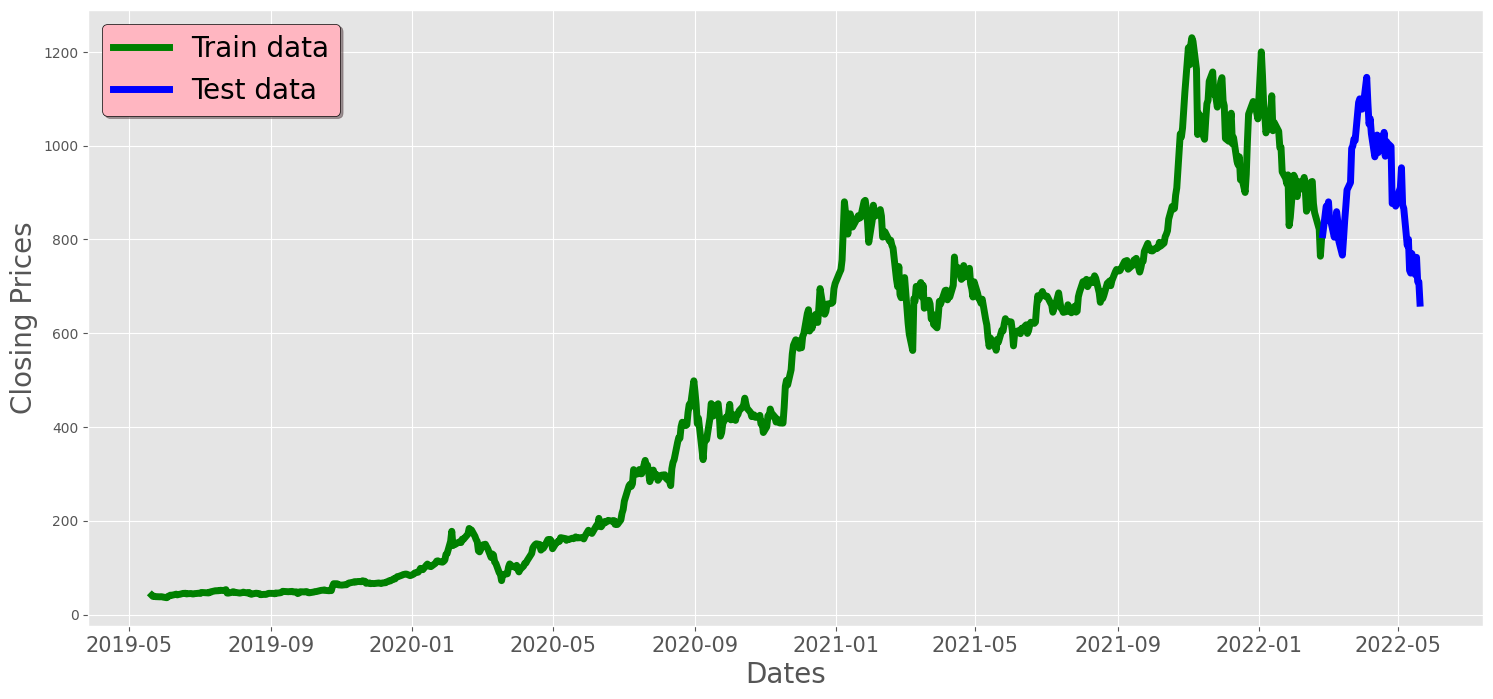

In [59]:
#split data into train and training set
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [ ]:
Auto-correlations
After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR 
or MA terms are needed to correct any autocorrelation that remains in the differenced series.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can 
tentatively identify the numbers of AR and/or MA terms that are needed.

Autocorrelation function plot (ACF): Autocorrelation refers to how correlated a time series is with its past values whereas 
    the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the 
    correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.
Normally, we employ either the AR term or the MA term in an ARIMA model. Both of these phrases are rarely used on rare 
occasions. The ACF plot is used to determine which of these terms we should utilise for our time series.

If the autocorrelation at lag 1 is positive, we utilise the AR model.
If the autocorrelation at lag 1 is negative, we employ the MA model.
We move on to Partial Autocorrelation function plots (PACF) after plotting the ACF plot.

Partial Autocorrelation function plots (PACF) A partial autocorrelation is a summary of the relationship between an 
observation in a time series with observations at prior time steps with the relationships of intervening observations 
removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations 
due to the terms at shorter lags.
If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

Use AR terms in the model when the

ACF plots show autocorrelation decaying towards zero
PACF plot cuts off quickly towards zero
ACF of a stationary series shows positive at lag-1
Use MA terms in the model when the model is

Negatively Autocorrelated at Lag — 1
ACF that drops sharply after a few lags
PACF decreases more gradually

In [60]:
var1=tsla_close_diff_1

In [61]:
var=tsla_close_diff_1[1:]

In [62]:
df=pd.DataFrame([var,var1])

In [63]:
df.T.corr

<bound method DataFrame.corr of                 Close      Close
Date                            
2019-05-22        NaN  -2.469997
2019-05-23   0.551998   0.551998
2019-05-24  -0.972000  -0.972000
2019-05-28  -0.385998  -0.385998
2019-05-29   0.231998   0.231998
...               ...        ...
2022-05-16 -45.220032 -45.220032
2022-05-17  37.239990  37.239990
2022-05-18 -51.799988 -51.799988
2022-05-19  -0.390015  -0.390015
2022-05-20 -45.519958 -45.519958

[757 rows x 2 columns]>

In [67]:
# Ensure both arrays have the same length
min_length = min(len(var1), len(var))

var1_trimmed = var1[:min_length]
var_trimmed = var[:min_length]

# Now calculate the correlation
correlation_matrix = np.corrcoef(var1_trimmed, var_trimmed)
correlation_value = correlation_matrix[0, 1]  # Extract the correlation value
print(correlation_value)


-0.038975246752419423


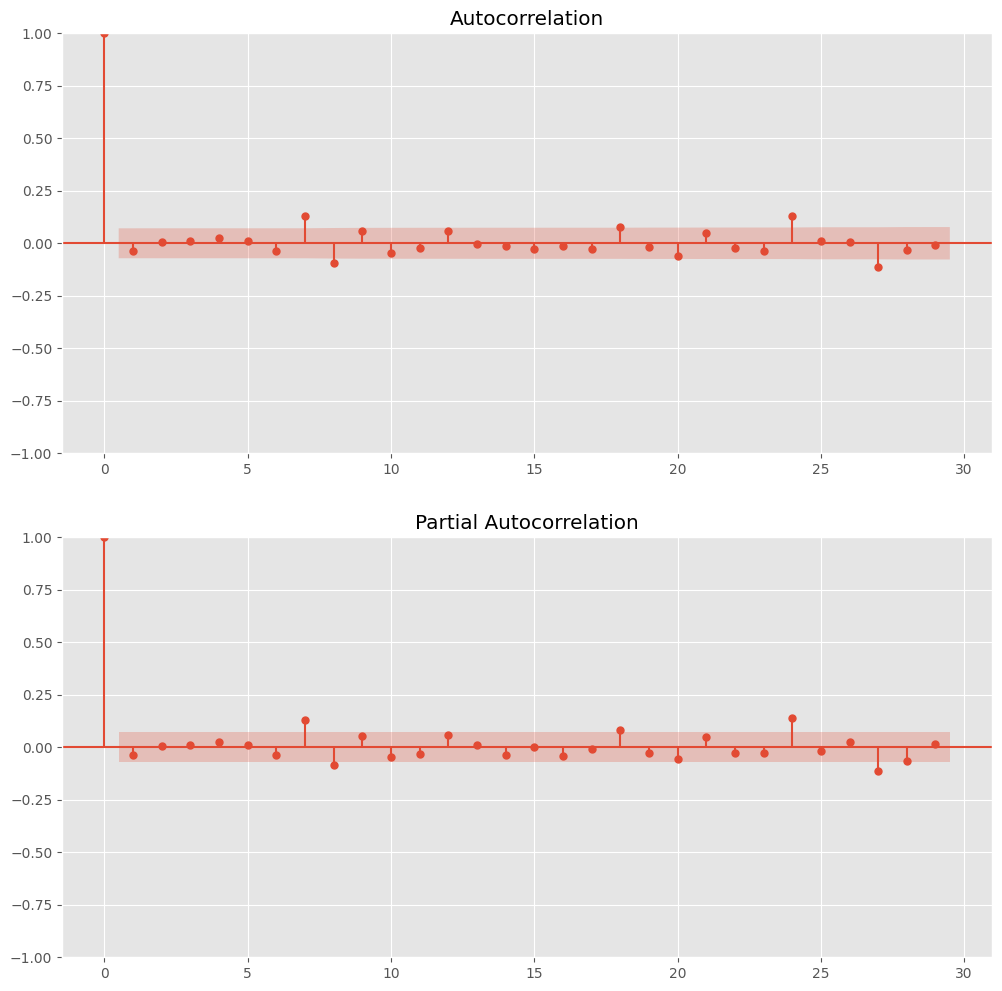

In [68]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(tsla_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(tsla_close_diff_1, ax=ax2)

In [69]:
6# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [70]:
float("inf")

inf

In [71]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [72]:
p_values = range(0, 3)

In [73]:
list(p_values)

[0, 1, 2]

In [74]:
train_data

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

In [75]:
test_data

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

In [76]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [77]:
arima_order=(1,0,1)

In [78]:
history = [x for x in train_data]

In [79]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [81]:
# Import the correct ARIMA module
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(history, order=arima_order)
model_fit = model.fit()


In [82]:
yhat = model_fit.summary()
       

In [83]:
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3157.458
Date:                Wed, 18 Sep 2024   AIC                           6322.915
Time:                        00:43:15   BIC                           6341.108
Sample:                             0   HQIC                          6329.949
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.1028    277.956      1.616      0.106     -95.682     993.887
ar.L1          0.9982      0.002    526.459      0.000       0.994       1.002
ma.L1         -0.0284      0.025     -1.150      0.250      -0.077       0.020
sigma2       493.3682     11.644     42.370      0.000     470.546     516.191
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2108.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              29.23   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
# Get the forecast (make sure you are using the correct method to get the prediction)
#yhat = model_fit.forecast(steps=1)[0]  # Extract the predicted value from the forecast result

# Perform the subtraction operation
result = test_data[0] - yhat

In [96]:
history = [x for x in train_data]
predictions = list()
conf_list = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    forecast_obj = model_fit.get_forecast(steps=1)
    fc = forecast_obj.predicted_mean  # Forecasted value
    conf = forecast_obj.conf_int(alpha=0.05)  # Confidence intervals
    predictions.append(fc[0])
    conf_list.append(conf)
    history.append(test_data[t])

print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))


RMSE of ARIMA Model: 39.516397499397556


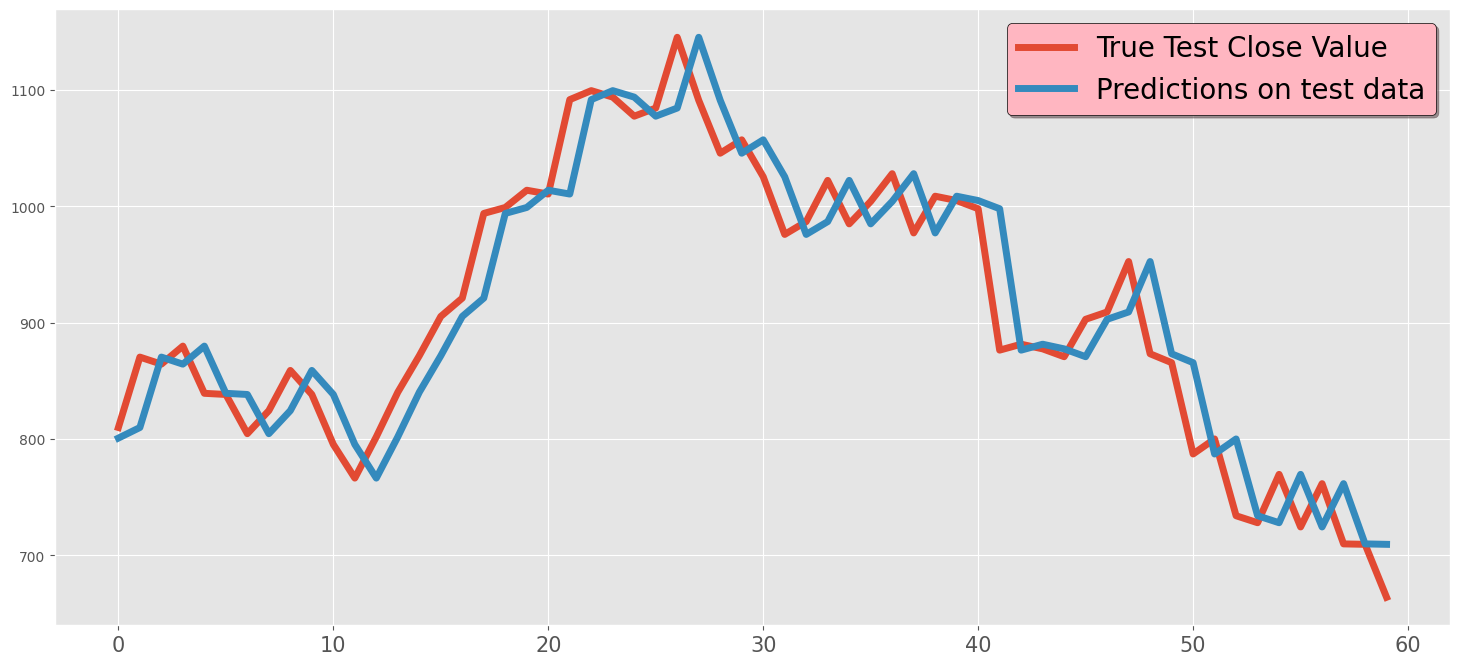

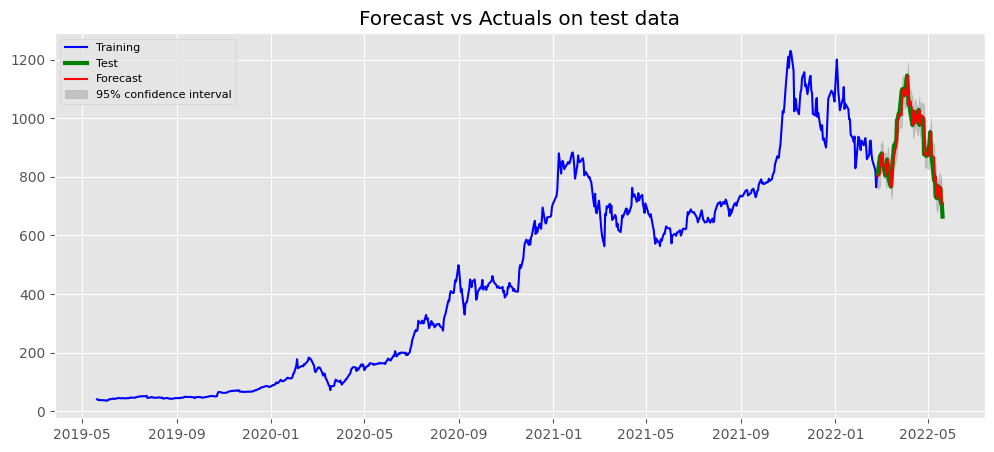

In [97]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

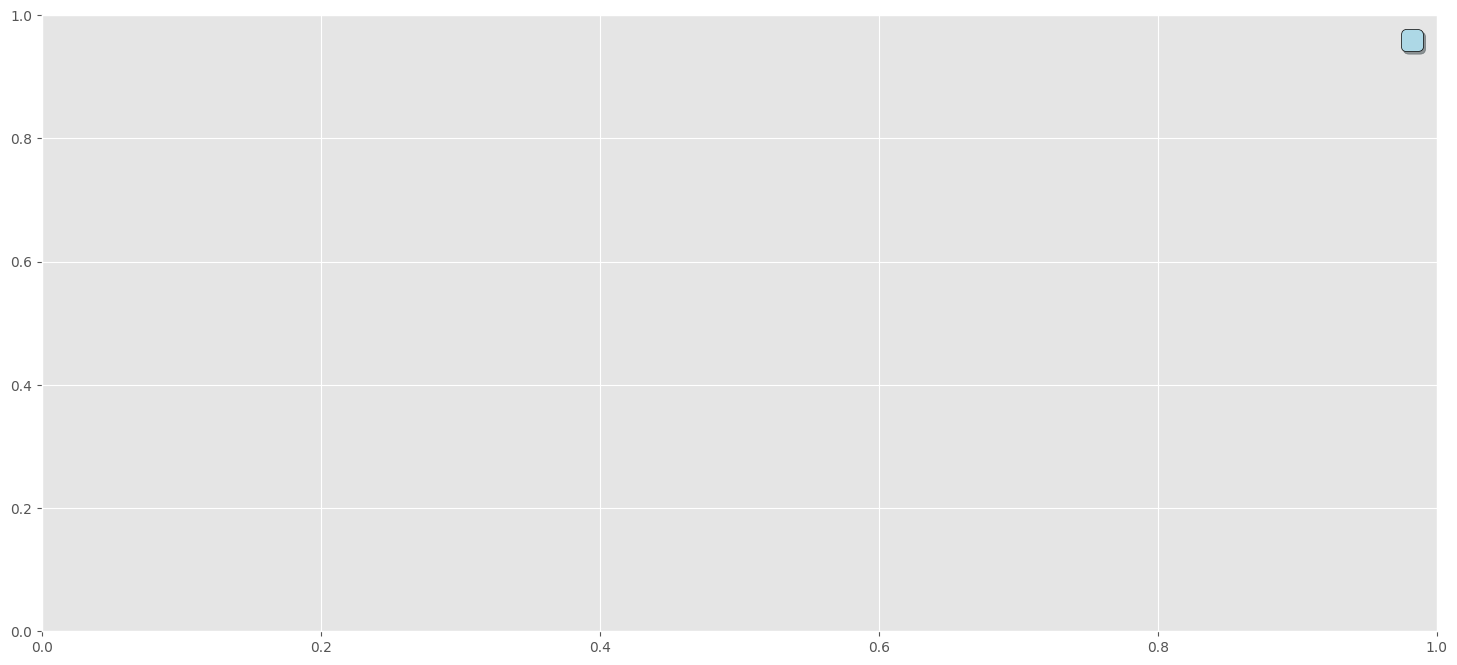

In [108]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
model_fit.predict(start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


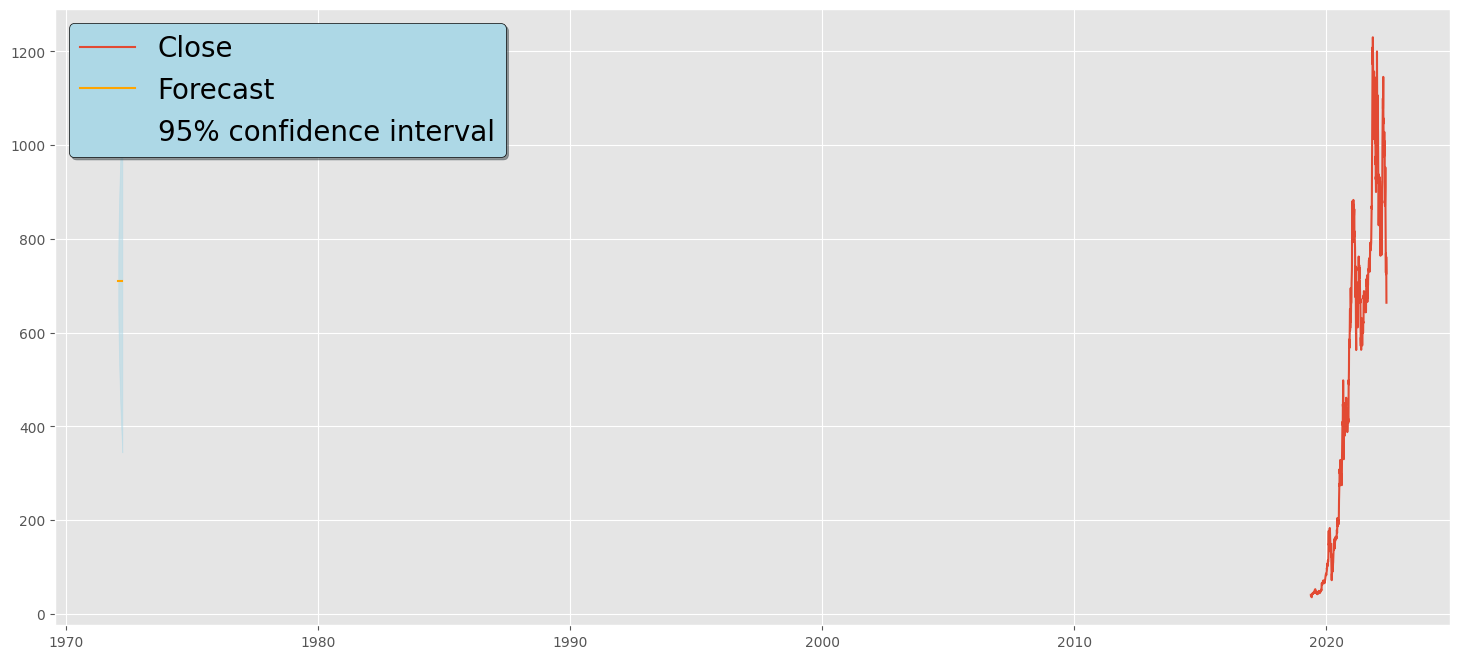

In [102]:
# Assuming model_fit is your fitted ARIMA model
forecast_obj = model_fit.get_forecast(steps=60)  # Forecast 60 steps ahead

# Extract forecasted values and confidence intervals
forecast_values = forecast_obj.predicted_mean
confidence_intervals = forecast_obj.conf_int()

# Convert confidence intervals to arrays if needed
lower_bound = confidence_intervals[:, 0]
upper_bound = confidence_intervals[:, 1]

# Plotting
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

# Plot the actual data
ax1.plot(df_close, label="Close")

# Plot forecasted values
ax1.plot(np.arange(len(df_close), len(df_close) + 60), forecast_values, label="Forecast", color='orange')

# Plot confidence intervals
ax1.fill_between(np.arange(len(df_close), len(df_close) + 60),
                 lower_bound,  # lower bound
                 upper_bound,  # upper bound
                 color='lightblue', alpha=0.5, label="95% confidence interval")

# Customizing the plot
plt.grid("both")
plt.legend(['Close', 'Forecast', '95% confidence interval'], fontsize=20, shadow=True, facecolor='lightblue', edgecolor='k')
plt.show()


In [ ]:
Introduction to SARIMA Models
SARIMA (Seasonal ARIMA) is a modification of ARIMA that explicitly allows univariate time series data with a seasonal 
component. SARIMA accepts an additional set of parameters (P,D,Q)m that specify the model's seasonal components.

P: Seasonal auto regressive order
D: Seasonal difference order
Q: Seasonal moving average order
m: The number of time steps for a single seasonal period
This is written as (p,d,q)×(P,D,Q)m.

From the ACF and PACF that we have plotted, we can determine the value of Seasonal (P,D,Q). In ACF and PACF, we have one 
spike at lag 3 that is out of confidence interval and also there is no significant correlation at lag 3 and lag 6. So, the 
order of P and Q is (1, 1). As we have used differencing of 1 to make data stationary so, D = 1. So, the best order for SARIMA 
is(0,1,0)x(1,1,1)3

In [109]:
train_data=tsla_close_diff_1[0:-60]
test_data=tsla_close_diff_1[-60:]

In [110]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 57.869252504720166


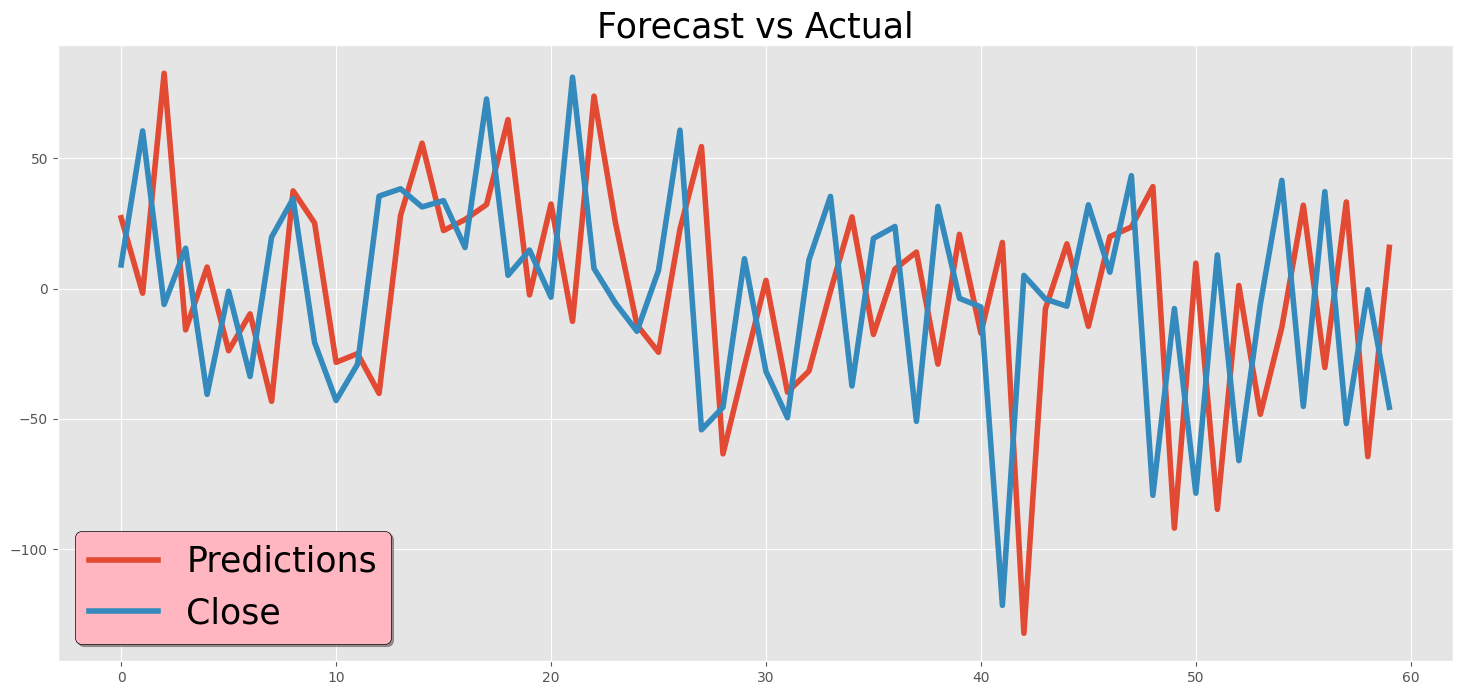

In [111]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

RMSE of Auto ARIMA Model : 39.61388467968555


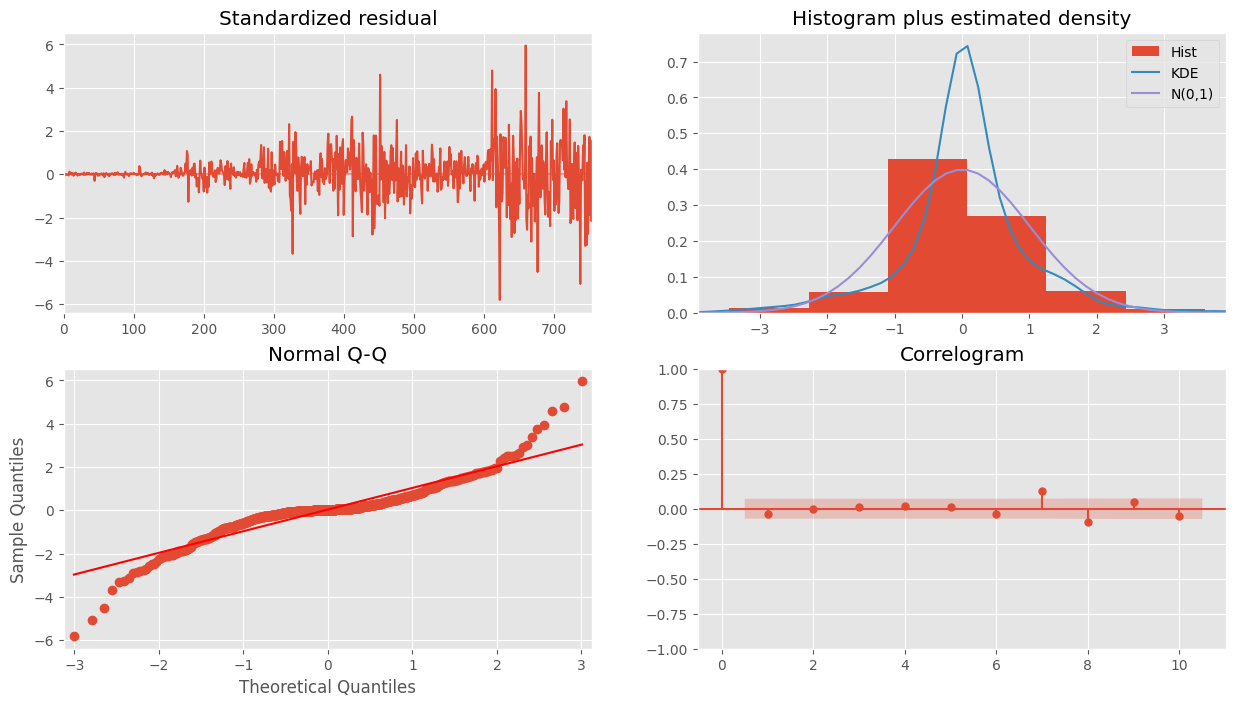

In [112]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a 
    skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any 
autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, 
you’ll need to add more Xs (predictors) to the model.

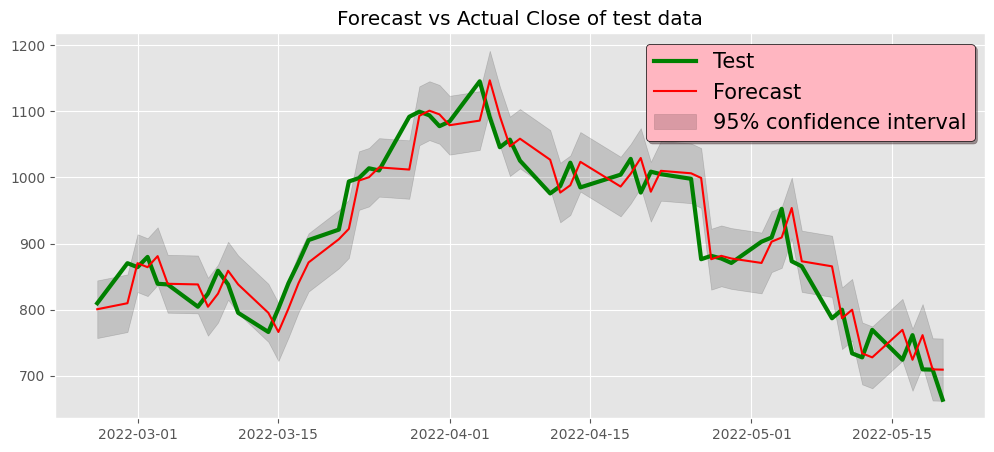

In [113]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

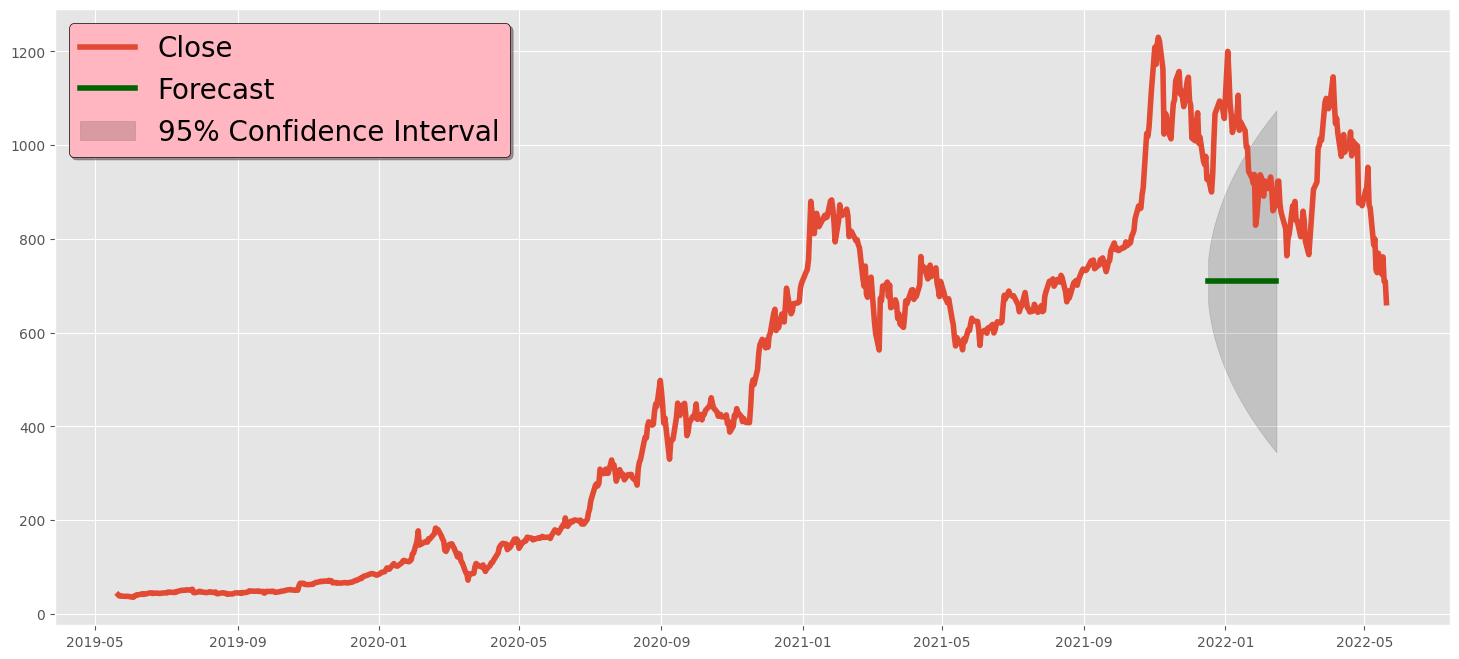

In [114]:
fc, confint = model_autoARIMA.predict(n_periods=60, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='17/12/2021', periods=60))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='17/12/2021', periods=60))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='17/12/2021', periods=60))

# Plot
plt.figure(figsize = (18,8))
plt.plot(df_close, linewidth = 4, label = 'Close')
plt.plot(fc_series, color='darkgreen', linewidth = 4, label = 'Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()